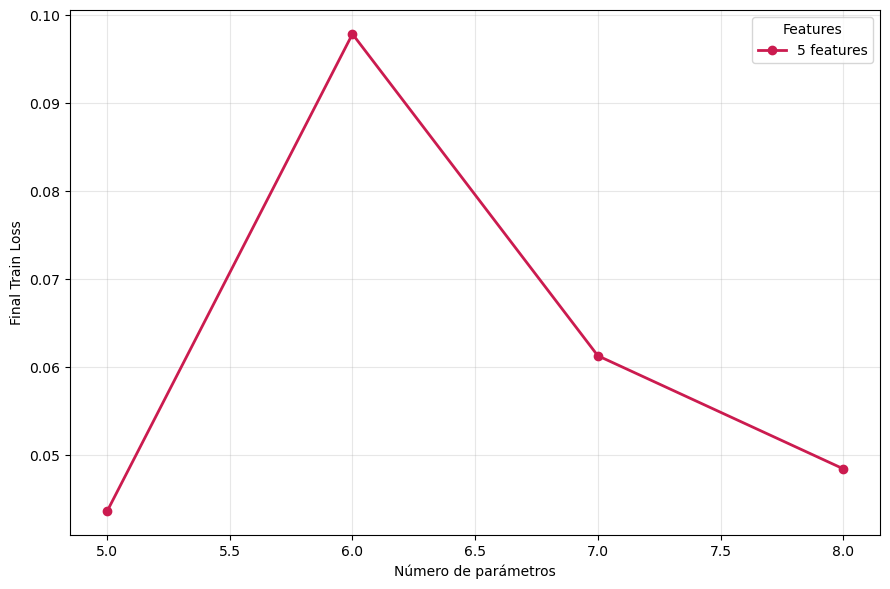

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE_PATH = "/Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params"
LR = 0.006
features_list = [5]
params_list   = [5, 6, 7, 8]
LAYERS = 6

palette = sns.color_palette("rocket", len(features_list))

loss_col = "Loss"

plt.figure(figsize=(9,6))

for i, F in enumerate(features_list):
    folder = f"{BASE_PATH}"
    xs, ys = [], []
    for P in params_list:
        metrics_path = f"{folder}/metrics_NUM_FEATURES_{F}_NUM_PARAMS_{P}_LAYERS_{LAYERS}.csv"
        if not os.path.exists(metrics_path):
            print(f"[warn] no existe: {metrics_path}")
            continue
        df = pd.read_csv(metrics_path)
        if loss_col not in df.columns:
            print(f"[warn] columna {loss_col} no está en: {metrics_path}")
            continue
        xs.append(P)
        ys.append(float(df[loss_col].iloc[0]))
    if xs:
        plt.plot(xs, ys, marker="o", linewidth=2, label=f"{F} features", color=palette[i])

plt.xlabel("Número de parámetros")
plt.ylabel("Final Train Loss")
plt.grid(True, alpha=0.3)
plt.legend(title="Features")
plt.tight_layout()
plt.show()


[warn] no existe: /Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params/metrics_NUM_FEATURES_6_NUM_PARAMS_6_LAYERS_6.csv
[warn] no existe: /Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params/metrics_NUM_FEATURES_6_NUM_PARAMS_7_LAYERS_6.csv
[warn] no existe: /Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params/metrics_NUM_FEATURES_6_NUM_PARAMS_8_LAYERS_6.csv
[warn] no existe: /Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params/metrics_NUM_FEATURES_7_NUM_PARAMS_6_LAYERS_6.csv
[warn] no existe: /Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params/metrics_NUM_FEATURES_7_NUM_PARAMS_7_LAYERS_6.csv
[warn] no existe: /Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params/metrics_NUM_FEATURES_7_NUM_PARAMS_8_LAYERS_6.csv
[warn] no existe: /Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params/metrics_NUM_FEATURES_8_NUM_PARAMS_6_LAYERS_6.csv
[warn] no existe: /Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5

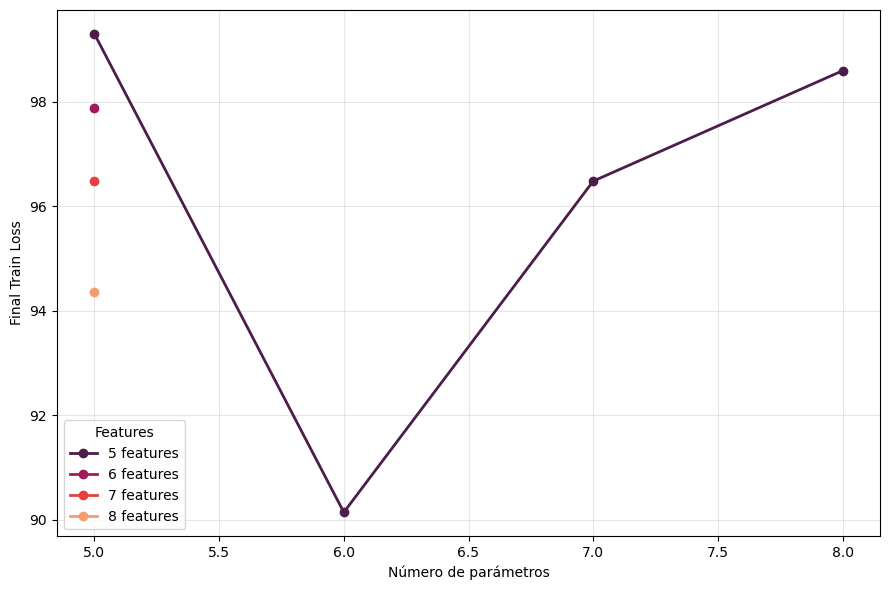

In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE_PATH = "/Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params"
LR = 0.006
features_list = [5, 6, 7, 8]
params_list   = [5, 6, 7, 8]
LAYERS = 6

palette = sns.color_palette("rocket", len(features_list))

loss_col = "TrainAcc"

plt.figure(figsize=(9,6))

for i, F in enumerate(features_list):
    folder = f"{BASE_PATH}"
    xs, ys = [], []
    for P in params_list:
        metrics_path = f"{folder}/metrics_NUM_FEATURES_{F}_NUM_PARAMS_{P}_LAYERS_{LAYERS}.csv"
        if not os.path.exists(metrics_path):
            print(f"[warn] no existe: {metrics_path}")
            continue
        df = pd.read_csv(metrics_path)
        if loss_col not in df.columns:
            print(f"[warn] columna {loss_col} no está en: {metrics_path}")
            continue
        xs.append(P)
        ys.append(float(df[loss_col].iloc[0]))
    if xs:
        plt.plot(xs, ys, marker="o", linewidth=2, label=f"{F} features", color=palette[i])

plt.xlabel("Número de parámetros")
plt.ylabel("Final Train Loss")
plt.grid(True, alpha=0.3)
plt.legend(title="Features")
plt.tight_layout()
plt.show()


Best train loss: 0.04301086763366
Best train loss: 96.47887323943662


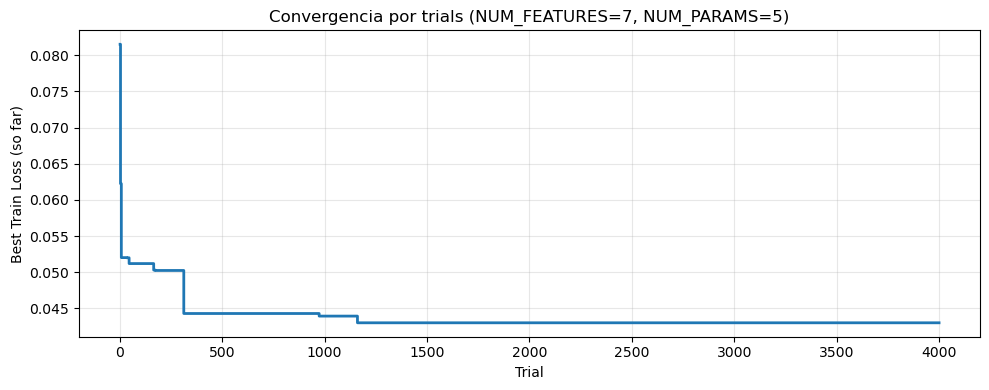

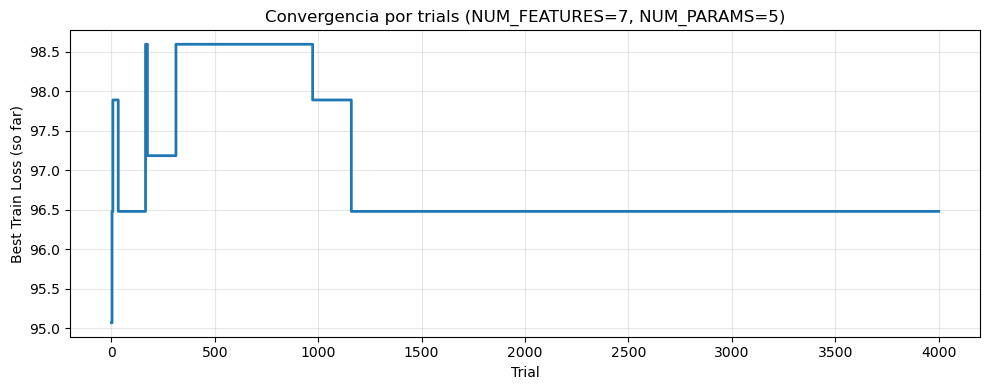

In [12]:
import glob, pandas as pd
import matplotlib.pyplot as plt

BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params"
NUM_FEATURES = 7
NUM_PARAMS   = 5
LAYERS       = 6

files = sorted(glob.glob(f"{BASE_SAVE_DIR}/train_progress_NUMFEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_LAYERS_{LAYERS}_*.csv"))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
df = df.sort_values("Trial").reset_index(drop=True)

BestLoss = df["BestTrainLoss"].iloc[-1]
print(f"Best train loss: {BestLoss}")

BestTrainAcc = df["BestTrainAcc"].iloc[-1]
print(f"Best train loss: {BestTrainAcc}")

# Plot
plt.figure(figsize=(10,4))
plt.plot(df["Trial"], df["BestTrainLoss"], drawstyle="steps-post", linewidth=2)
plt.xlabel("Trial")
plt.ylabel("Best Train Loss (so far)")
plt.title(f"Convergencia por trials (NUM_FEATURES={NUM_FEATURES}, NUM_PARAMS={NUM_PARAMS})")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(df["Trial"], df["BestTrainAcc"], drawstyle="steps-post", linewidth=2)
plt.xlabel("Trial")
plt.ylabel("Best Train Loss (so far)")
plt.title(f"Convergencia por trials (NUM_FEATURES={NUM_FEATURES}, NUM_PARAMS={NUM_PARAMS})")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob, re

import seaborn as sns

BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params"
NUM_FEATURES = 8
NUM_PARAMS   = 4

# Cargar curvas de loss para cada número de layers
records = {}

loss_curve_NUMFEATURES_7_NUM_PARAMS_8_LAYERS_6
for f in sorted(glob.glob(f"{BASE_SAVE_DIR}/loss_curve_NUMFEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_LAYERS_{}.csv")):
    m = re.search(r"LAYERS_(\d+)", f)
    if not m:
        continue
    layers = int(m.group(1))
    df = pd.read_csv(f)
    records[layers] = df

# Graficar
palette = sns.color_palette("rocket", 11)

plt.figure(figsize=(9,6))
for layers, df in sorted(records.items()):
    plt.plot(df["Epoch"], df["TrainLossAvg"], label=f"{layers} layers", color=palette[layers])

plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title(f"Curvas de entrenamiento (NUM_FEATURES={NUM_FEATURES}, NUM_PARAMS={NUM_PARAMS})")
plt.legend(title="Modelo")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

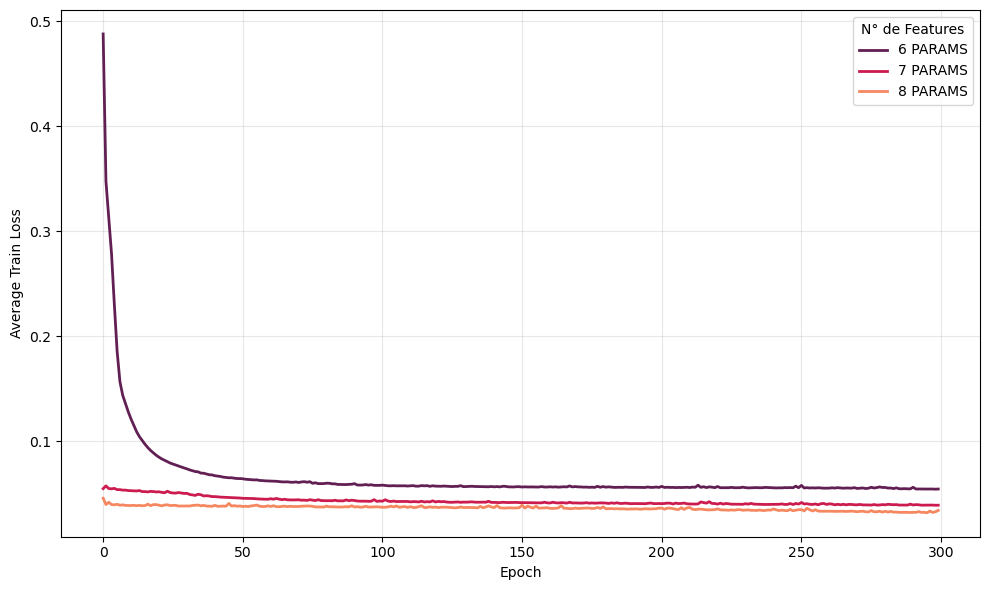

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE_PATH = "/Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params"
NUM_FEATURES  = 5                 # fijo
features_list = [6, 7, 8]   # 👈 distintos números de features a comparar
LAYERS = 6
palette = sns.color_palette("rocket", len(features_list))

plt.figure(figsize=(10,6))

for i, NUM_PARAMS in enumerate(features_list):
    csv_path = f"{BASE_PATH}/loss_curve_NUM_FEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_LAYERS_{LAYERS}.csv"
    
    df = pd.read_csv(csv_path)
    plt.plot(df["Epoch"],
             df["TrainLossAvg"],
             label=f"{NUM_PARAMS} PARAMS",
             linewidth=2,
             color=palette[i])

plt.xlabel("Epoch")
plt.ylabel("Average Train Loss")
plt.legend(title="N° de Features")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/prueba/desde3layers"
NUM_FEATURES = 8
NUM_PARAMS   = 4
LAYERS       = 3

# Cargar y concatenar todos los chunks
files = sorted(glob.glob(f"{BASE_SAVE_DIR}/train_progress_NUMFEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_*.csv"))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)

# Asegurar orden por Trial y recomputar best-so-far por seguridad
df = df.sort_values("Trial").reset_index(drop=True)
df["BestSoFar"] = df["BestTrainLoss"].cummin()

plt.figure(figsize=(10,4))
plt.plot(df["Trial"], df["BestSoFar"], drawstyle="steps-post", linewidth=2)
plt.xlabel("Trial")
plt.ylabel("Best Train Loss (so far)")
plt.title(f"Convergencia por trials (NUM_FEATURES={NUM_FEATURES}, NUM_PARAMS={NUM_PARAMS})")
plt.grid(True, alpha=0.3)
# plt.xlim(0, 100)
plt.tight_layout()
plt.show()

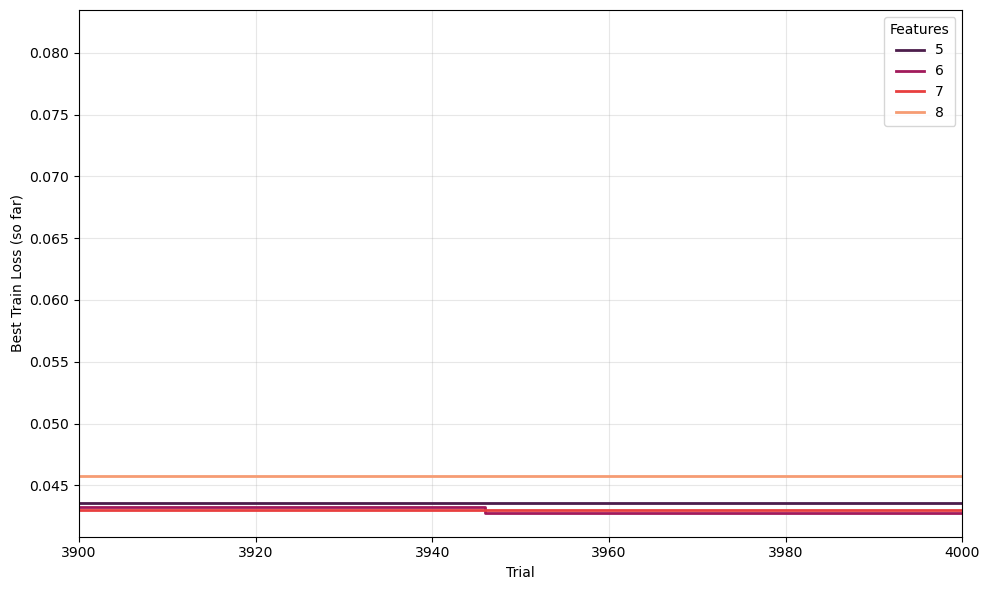

In [27]:
import glob, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params"
NUM_PARAMS = 5
features_list = [5, 6, 7, 8]
palette = sns.color_palette("rocket", len(features_list))

plt.figure(figsize=(10,6))

for i, F in enumerate(features_list):
    # upload and concatenate all files (per feature)
    files = sorted(glob.glob(f"{BASE_SAVE_DIR}/train_progress_NUMFEATURES_{F}_NUM_PARAMS_{NUM_PARAMS}_*.csv"))
    if not files:
        print(f"[warn] no encontré archivos para NUM_FEATURES={F}")
        continue
    df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
    # sort by trial and re-compute best-so-far
    df = df.sort_values("Trial").reset_index(drop=True)
    df["BestSoFar"] = df["BestTrainLoss"].cummin()
    # plot
    plt.plot(df["Trial"], df["BestSoFar"], drawstyle="steps-post", linewidth=2, label=f"{F}", color=palette[i])

plt.xlabel("Trial")
plt.ylabel("Best Train Loss (so far)")
plt.legend(title="Features")
plt.xlim(3900, 4000)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

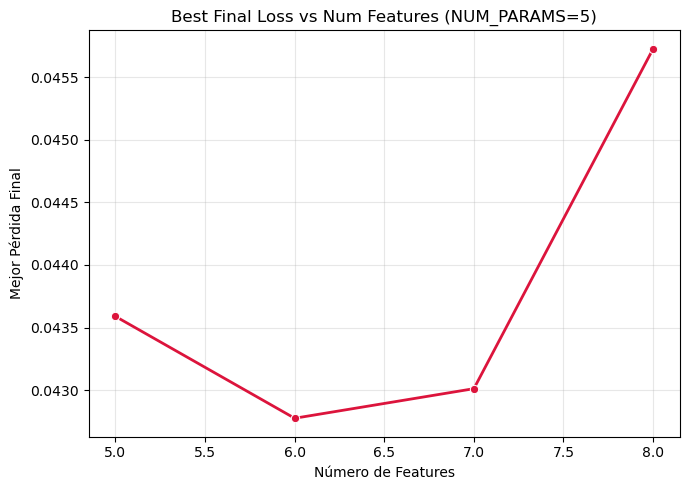

   Features  FinalBestLoss
0         5       0.043589
1         6       0.042774
2         7       0.043011
3         8       0.045729


In [28]:
import glob, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params"
NUM_PARAMS = 5
features_list = [5, 6, 7, 8]

summary = []   # acá guardamos (num_features, last_best)

for F in features_list:
    files = sorted(glob.glob(
        f"{BASE_SAVE_DIR}/train_progress_NUMFEATURES_{F}_NUM_PARAMS_{NUM_PARAMS}_*.csv"
    ))
    if not files:
        print(f"[warn] no encontré archivos para NUM_FEATURES={F}")
        continue

    df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
    df = df.sort_values("Trial").reset_index(drop=True)
    df["BestSoFar"] = df["BestTrainLoss"].cummin()
    
    # Tomar el último valor de BestSoFar
    last_best = df["BestSoFar"].iloc[-1]
    summary.append({"Features": F, "FinalBestLoss": last_best})

# Convertir a DataFrame
summary_df = pd.DataFrame(summary).sort_values("Features")

# --- Plot ---
plt.figure(figsize=(7,5))
sns.lineplot(data=summary_df,
             x="Features",
             y="FinalBestLoss",
             marker="o",
             linewidth=2,
             color="crimson")

plt.xlabel("Número de Features")
plt.ylabel("Mejor Pérdida Final")
plt.title(f"Best Final Loss vs Num Features (NUM_PARAMS={NUM_PARAMS})")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(summary_df)  # por si querés ver la tabla numérica


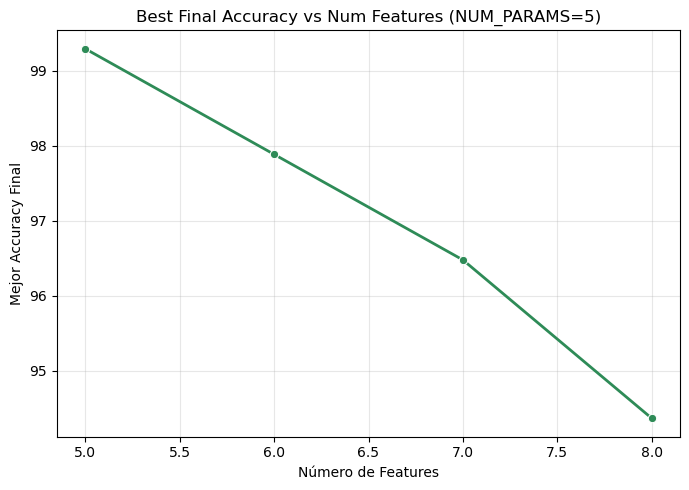

   Features  FinalBestAcc
0         5     99.295775
1         6     97.887324
2         7     96.478873
3         8     94.366197


In [29]:
import glob, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/Wine/qutrit/data/5params"
NUM_PARAMS = 5
features_list = [5, 6, 7, 8]

summary = []  # guardará (num_features, final_best_acc)

for F in features_list:
    files = sorted(glob.glob(
        f"{BASE_SAVE_DIR}/train_progress_NUMFEATURES_{F}_NUM_PARAMS_{NUM_PARAMS}_*.csv"
    ))
    if not files:
        print(f"[warn] no encontré archivos para NUM_FEATURES={F}")
        continue

    df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
    df = df.sort_values("Trial").reset_index(drop=True)

    # Tomar el último valor de la columna BestTrainAcc
    final_acc = df["BestTrainAcc"].iloc[-1]
    summary.append({"Features": F, "FinalBestAcc": final_acc})

# DataFrame de resumen
summary_df = pd.DataFrame(summary).sort_values("Features")

# --- Plot ---
plt.figure(figsize=(7,5))
sns.lineplot(data=summary_df,
             x="Features",
             y="FinalBestAcc",
             marker="o",
             linewidth=2,
             color="seagreen")

plt.xlabel("Número de Features")
plt.ylabel("Mejor Accuracy Final")
plt.title(f"Best Final Accuracy vs Num Features (NUM_PARAMS={NUM_PARAMS})")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(summary_df)
